In [22]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [23]:
# 2. Read CSV data
df = pd.read_csv('../Dataset/BID-Historical-Data_Group 9.csv')

# df['Date'] = pd.to_datetime(df['Date'])
# print(df['Date'])
def convert_str_to_number(x):
  x = x.replace(",", "")
  return float(x)

df['Price'] = df['Price'].apply(convert_str_to_number)
# Chuyển đổi cột 'Price' thành mảng NumPy
df['target']= df.Price.shift(-1)
df.dropna(inplace=True)
df = df[['Price','target']]
# df.info()
df

,Price,target
0,53500.0,53000.0
1,53000.0,53900.0
2,53900.0,53000.0
3,53000.0,53600.0
4,53600.0,52100.0
...,...,...
1246,26021.7,26710.5
1247,26710.5,26595.7
1248,26595.7,26480.9
1249,26480.9,25715.5


In [24]:
# 3. Split into train and test sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
train_data

,Price,target
0,53500.0,53000.0
1,53000.0,53900.0
2,53900.0,53000.0
3,53000.0,53600.0
4,53600.0,52100.0
...,...,...
995,32997.9,33931.8
996,33931.8,36461.1
997,36461.1,36305.5
998,36305.5,35916.4


In [ ]:
# #cach 1
# # 4.
# X_train = np.array(train_data['Date']).reshape(-1, 1)
# y_train = np.array(train_data['Price'])
# y_test = np.array(test_data)
# y_val = np.array(val_data)

In [25]:
# #cach 2
# # 4.
X_train = np.array(train_data['Price']).reshape(-1,1)
y_train = np.array(train_data['target'])
y_test = np.array(test_data['target'])
y_val = np.array(val_data['target'])

In [26]:
# 5. cấu hình XGBoost model
# model = xgb.XGBRegressor(n_estimators=1000,random_state=42)
model = xgb.XGBRegressor(
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42)


In [27]:
# 6. Fit mô hình với dữ liệu train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=8,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [28]:
# 7. Dự báo dữ liệu test, val
X_test = np.array(test_data['Price']).reshape(-1, 1)
X_val = np.array(val_data['Price']).reshape(-1, 1)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)
y_pred

array([36268.617, 35184.85 , 35032.973, 37001.086, 37001.086, 38393.5  ,
       35316.152, 38059.113, 39549.43 , 39549.43 , 41194.953, 40166.195,
       39012.49 , 38439.03 , 39243.156, 39243.156, 37988.945, 40166.195,
       41307.02 , 41894.527, 41830.395, 41894.527, 40166.195, 40807.793,
       42888.09 , 41407.387, 41307.02 , 41894.527, 41407.387, 39549.43 ,
       39012.49 , 39012.49 , 39549.43 , 38542.9  , 37001.086, 35604.77 ,
       35276.68 , 35604.77 , 36268.617, 36282.2  , 36282.2  , 36060.83 ,
       33991.523, 34752.91 , 34637.71 , 34913.316, 33733.863, 32343.326,
       31907.291, 31860.443, 33027.117, 33027.117, 31851.236, 31039.191,
       31444.5  , 31355.736, 30657.314, 31355.736, 31717.643, 30694.455,
       31054.54 , 32209.217, 31606.998, 31842.223, 31355.736, 30694.455,
       31172.654, 32532.498, 32347.92 , 32105.695, 31996.652, 31907.291,
       32726.74 , 34330.902, 32558.139, 31996.652, 31996.652, 32105.695,
       31860.443, 32238.305, 31860.443, 31307.271, 

In [30]:
# 11. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)


Testing RMSE: 841.9720428413748
Testing MAPE: 1.7749848735521494
Testing MAE: 618.8854093749995


In [ ]:
#Dự đoán 30 ngày tiếp theo


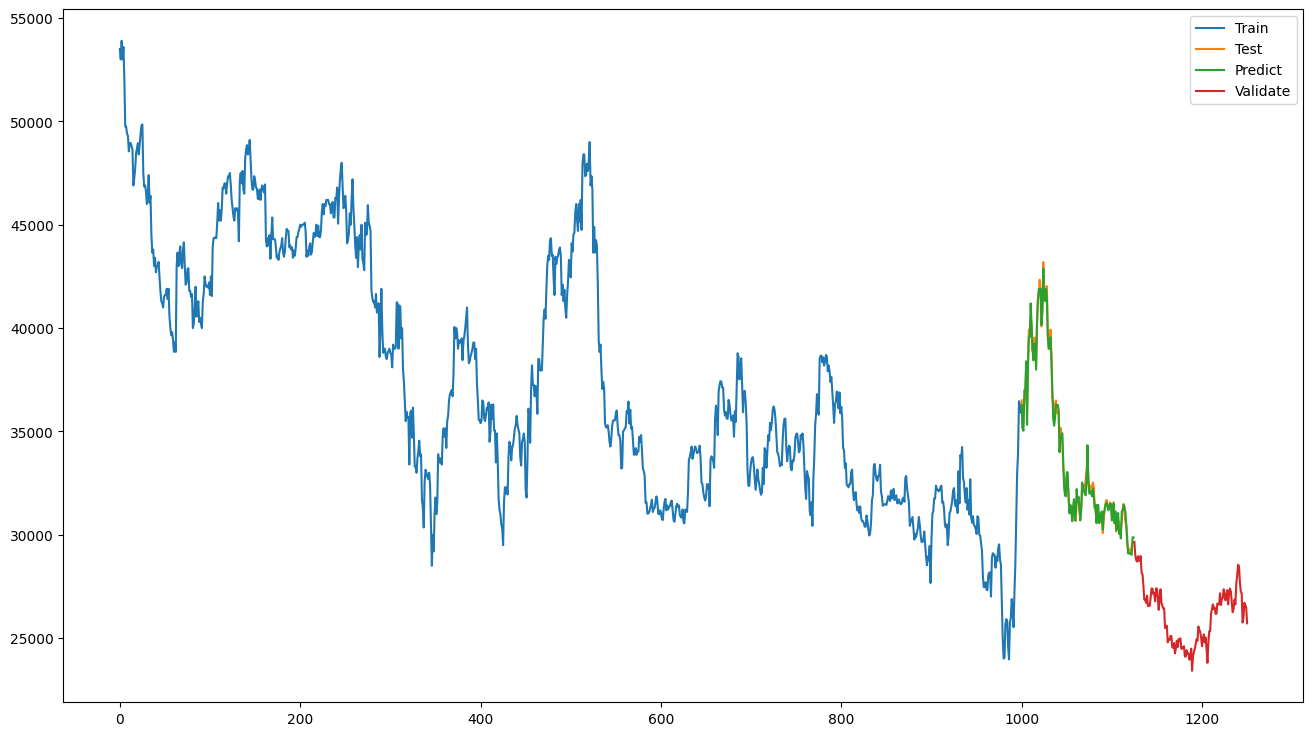

In [31]:
# 14.Vẽ hình
plt.figure(figsize =(16, 9))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,train_data['Price'])
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_data['Price'])
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_data['Price'])
plt.legend(['Train','Test','Predict','Validate'])
plt.show()